In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

###### 1. Load the dataset into a pandas dataframe. Name the variable as “survey”.

In [2]:
survey= pd.read_excel("Sample Survey.xlsx",sheet_name='Data')
survey

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6862,6863,2020-09-01,Rural,10th Pass,"BPL/Below ₹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,Male,166,Gen,0.036329
6863,6864,2020-09-01,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,30,Male,169,BC,0.252780
6864,6865,2020-09-01,Urban,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),RJD,Can’t say,Fully Dissatisfied,20,Male,241,Gen,1.812926
6865,6866,2020-09-01,Rural,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,Did not vote,Fully Satisfied,Somewhat Satisfied,23,Male,243,Gen,0.080137


###### 2. How many samples were collected on each day?

In [3]:
# samples collected on each day

no_of_samples = survey.value_counts('collection_date')
no_of_samples

collection_date
2020-08-24    1479
2020-08-25     998
2020-08-28     761
2020-08-27     665
2020-08-29     620
2020-09-01     607
2020-08-26     598
2020-08-30     582
2020-08-31     557
dtype: int64

In [4]:
#  proportion of the total respondents were aged less than 45
survey['age'] = survey['age'].replace('24ko',24)

In [5]:
survey['age'].unique()

array([26, 34, 25, 36, 22, 38, 23, 42, 51, 29, 24, 30, 39, 37, 19, 44, 53,
       32, 21, 18, 20, 27, 48, 28, 45, 74, 35, 31, 70, 40, 49, 46, 43, 41,
       33, 58, 56, 50, 55, 54, 62, 60, 59, 47, 61, 52, 66, 57, 67, 65, 71,
       63, 64, 68, 69, 99, 72, 75, 76], dtype=int64)

###### 3. What proportion of the total respondents were aged less than 45?

In [6]:
survey[survey['age']>45]['weight'].sum()/survey['weight'].sum()


0.18157966714599846

###### 4. Create a new column in the dataframe “age_group”. This column should contain the age group the respondent belongs to. The age groups are 18-25, 25-40, 40-55 and 55+. The dataframe should look like this after the column creation:m

In [7]:
# age groups 
bins = [18,25,40,55,float('inf')]
labels = ['18-25','25-40','40-55','55+']
survey['age_group'] = pd.cut(survey['age'] ,bins=bins,labels=labels,right=False)
survey[['response_id','age','age_group']].head()

,response_id,age,age_group
0,1,26,25-40
1,2,34,25-40
2,3,25,25-40
3,4,36,25-40
4,5,22,18-25


###### 5. How many samples were collected for each age-group? Which age-group had the most samples?

In [8]:
survey['age_group'].value_counts()

25-40    3844
18-25    2094
40-55     801
55+       128
Name: age_group, dtype: int64

In [9]:
print(survey['age_group'].value_counts().idxmax() )

25-40


###### 6. What proportion of the respondents had opted for the RJD party in both the Vote_Now and the Past_Vote questions?

In [10]:
rjd_votes = survey[(survey['Vote_Now']=='RJD')&(survey['Past_Vote']=='RJD')]
rjd_votes

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298,25-40
9,10,2020-08-24,Urban,12th Pass,"₹ 20,000 - ₹ 30,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,26,Male,181,BC,0.713059,25-40
16,17,2020-08-24,Rural,Post - Graduation,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,24,Male,194,BC,0.769738,18-25
19,20,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,37,Male,200,BC,0.936383,25-40
21,22,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,29,Male,210,BC,0.713059,25-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6846,6847,2020-09-01,Rural,Post - Graduation,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,31,Male,151,BC,0.483757,25-40
6848,6849,2020-09-01,Rural,Post - Graduation,"₹ 30,000 - ₹ 50,000",RJD,RJD,Fully Dissatisfied,Can’t say,27,Male,143,BC,0.200389,25-40
6858,6859,2020-09-01,Rural,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Fully Satisfied,24,Male,241,Gen,1.812926,18-25
6860,6861,2020-09-01,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Satisfied,25,Male,145,BC,0.528469,25-40


In [11]:
len(rjd_votes)/len(survey)

0.1181010630551915

###### 7. For each day of sample collection, determine the proportion of respondents who were fully satisfied with the performance of the CM. So if there were a total of 1000 samples on day 1 and 300 out of those said they were fully satisfied, then our answer for that day would be 0.3.

In [12]:
survey['collection_date'].value_counts()

2020-08-24    1479
2020-08-25     998
2020-08-28     761
2020-08-27     665
2020-08-29     620
2020-09-01     607
2020-08-26     598
2020-08-30     582
2020-08-31     557
Name: collection_date, dtype: int64

In [13]:
print(len(survey[(survey['collection_date']=='2020-08-24')&(survey['CM_satisfaction']=='Fully Satisfied')])/len(survey[survey['collection_date']=='2020-08-24']))
print(len(survey[(survey['collection_date']=='2020-08-25')&(survey['CM_satisfaction']=='Fully Satisfied')])/len(survey[survey['collection_date']=='2020-08-25']))
print(len(survey[(survey['collection_date']=='2020-08-28')&(survey['CM_satisfaction']=='Fully Satisfied')])/len(survey[survey['collection_date']=='2020-08-28']))
print(len(survey[(survey['collection_date']=='2020-08-27')&(survey['CM_satisfaction']=='Fully Satisfied')])/len(survey[survey['collection_date']=='2020-08-27']))
print(len(survey[(survey['collection_date']=='2020-08-29')&(survey['CM_satisfaction']=='Fully Satisfied')])/len(survey[survey['collection_date']=='2020-08-29']))
print(len(survey[(survey['collection_date']=='2020-09-01')&(survey['CM_satisfaction']=='Fully Satisfied')])/len(survey[survey['collection_date']=='2020-09-01']))
print(len(survey[(survey['collection_date']=='2020-08-26')&(survey['CM_satisfaction']=='Fully Satisfied')])/len(survey[survey['collection_date']=='2020-08-26']))
print(len(survey[(survey['collection_date']=='2020-08-30')&(survey['CM_satisfaction']=='Fully Satisfied')])/len(survey[survey['collection_date']=='2020-08-30']))
print(len(survey[(survey['collection_date']=='2020-08-31')&(survey['CM_satisfaction']=='Fully Satisfied')])/len(survey[survey['collection_date']=='2020-08-31']))

0.09871534820824882
0.09519038076152304
0.12089356110381078
0.081203007518797
0.11774193548387096
0.12355848434925865
0.09866220735785954
0.11168384879725086
0.11131059245960502


In [14]:
# optimised approach
grouped_by_day = survey.groupby('collection_date')
total_respondant_per_day = grouped_by_day['response_id'].count()
fully_satisfied_per_day = survey.groupby('collection_date')['CM_satisfaction'].apply(lambda x: (x == 'Fully Satisfied').sum())
proportion_fully_satisfied_per_day = fully_satisfied_per_day/total_respondant_per_day
print(proportion_fully_satisfied_per_day)

collection_date
2020-08-24    0.098715
2020-08-25    0.095190
2020-08-26    0.098662
2020-08-27    0.081203
2020-08-28    0.120894
2020-08-29    0.117742
2020-08-30    0.111684
2020-08-31    0.111311
2020-09-01    0.123558
dtype: float64


###### 8. In a similar fashion create a day-wise proportion of respondents that opted fully dissatisfied with their MLA. Create a line plot of the result with date on x-axis and proportions on the y-axis.

In [15]:
fully_dissatisfied_per_day = survey.groupby('collection_date')['CM_satisfaction'].apply(lambda x: (x == 'Fully Dissatisfied').sum())
proportion_fully_dissatisfies_per_day = fully_dissatisfied_per_day/total_respondant_per_day
dissatisfied_propotion_df = proportion_fully_dissatisfies_per_day.reset_index(name='proportion_fully_dissatisfied')
print(dissatisfied_propotion_df)

  collection_date  proportion_fully_dissatisfied
0      2020-08-24                       0.434077
1      2020-08-25                       0.433868
2      2020-08-26                       0.431438
3      2020-08-27                       0.442105
4      2020-08-28                       0.458607
5      2020-08-29                       0.456452
6      2020-08-30                       0.429553
7      2020-08-31                       0.450628
8      2020-09-01                       0.415157


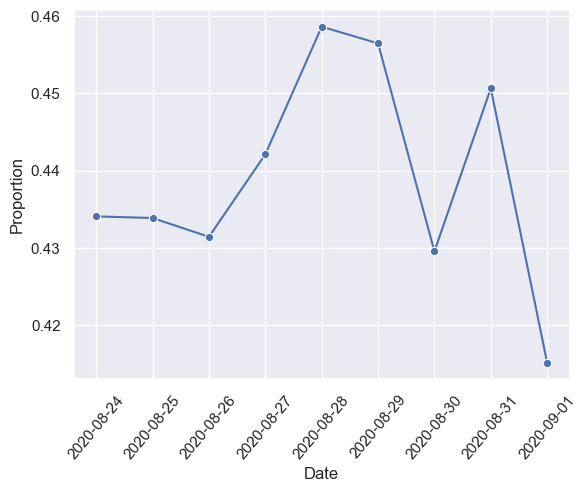

In [16]:
sns.lineplot(x='collection_date'
             ,y='proportion_fully_dissatisfied' 
             ,data=dissatisfied_propotion_df
             ,marker='o')
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.xticks(rotation=50)
plt.show()

###### 9. Create a pivot-table (or crosstab) with index as Past_Vote, Column as Vote_Now and cell values as the count of samples.

In [17]:
pivot_table1 = pd.crosstab(index=survey['Past_Vote'] ,columns=survey['Vote_Now'] ,values=survey['response_id'] ,aggfunc='count')
pivot_table1

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,7.0,1.0,1630.0,3.0,5.0,42.0,101.0,110.0,44.0,13.0,194.0,32.0,87.0,370.0,88.0,24.0,62.0,10.0
BSP,NaN,1.0,2.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Did not vote,8.0,5.0,231.0,2.0,1.0,22.0,41.0,69.0,10.0,16.0,83.0,11.0,51.0,195.0,20.0,3.0,31.0,5.0
HAM,2.0,NaN,25.0,NaN,1.0,NaN,3.0,2.0,2.0,NaN,4.0,NaN,NaN,6.0,4.0,NaN,1.0,NaN
INC,NaN,6.0,6.0,NaN,NaN,57.0,10.0,9.0,NaN,3.0,6.0,3.0,3.0,100.0,1.0,2.0,7.0,NaN
JAP(L),NaN,NaN,4.0,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN
JD(U),6.0,10.0,254.0,2.0,2.0,45.0,72.0,279.0,29.0,9.0,90.0,18.0,43.0,435.0,13.0,25.0,36.0,6.0
LJP,NaN,NaN,76.0,1.0,NaN,4.0,3.0,6.0,9.0,2.0,3.0,NaN,2.0,17.0,1.0,NaN,1.0,NaN
Left Front,NaN,1.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,18.0,1.0,1.0,NaN,4.0,NaN,1.0,NaN,1.0


###### 10. Repeat the above question with the cell values as the sum of “weight”.

In [18]:
pivot_table2 = pd.crosstab(survey['Past_Vote'] ,survey['Vote_Now'] ,values=survey['weight'] ,aggfunc='sum' )
pivot_table2

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,4.807335,0.349996,1049.344112,0.452551,10.171283,50.055502,63.832368,68.029581,45.716215,7.537394,114.913686,8.790137,50.016163,250.948101,16.047570,18.715113,41.286954,18.691691
BSP,NaN,1.654731,5.174487,32.010277,NaN,2.298223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Did not vote,8.865896,5.379527,114.203906,3.329611,2.497170,27.791290,26.359190,58.983458,11.801813,13.050113,44.725179,7.289933,25.319524,173.882525,4.349832,5.041587,22.015457,10.696552
HAM,0.312607,NaN,25.348884,NaN,1.648856,NaN,0.712161,1.006719,2.496424,NaN,0.928984,NaN,NaN,7.713008,1.903148,NaN,0.039564,NaN
INC,NaN,11.105958,1.642875,NaN,NaN,161.742302,18.942597,11.077323,NaN,6.268726,5.999014,1.552038,1.588527,195.020050,5.340403,1.140299,8.558475,NaN
JAP(L),NaN,NaN,6.512846,NaN,NaN,NaN,57.876224,NaN,NaN,NaN,NaN,3.195682,NaN,2.164824,NaN,NaN,NaN,NaN
JD(U),12.457216,29.198610,156.243100,11.005903,2.639574,91.806261,106.217216,498.796862,33.148113,11.765603,61.109706,29.196072,45.175289,657.155514,4.015909,44.376194,58.137833,20.675288
LJP,NaN,NaN,85.010450,2.481377,NaN,21.613385,7.375946,11.382812,26.868529,1.712452,0.813171,NaN,1.927965,30.737989,0.478933,NaN,1.709409,NaN
Left Front,NaN,2.298223,0.209586,NaN,NaN,2.291368,NaN,NaN,NaN,44.280864,0.201455,8.309203,NaN,6.740281,NaN,0.877960,NaN,3.020887


###### 11. Create a dataframe by performing a group by over age_group and calculate the count of total samples under each age_group.

In [19]:
response_age_group = survey.groupby('age_group')['response_id'].count()
response_age_group_df = response_age_group.reset_index(name='samples')
response_age_group_df

,age_group,samples
0,18-25,2094
1,25-40,3844
2,40-55,801
3,55+,128


###### 12. Create a dataframe by performing a group by over age_group and finding the count of total samples for each age_group that opted for the JD(U) party in Vote_Now.

In [20]:
jd_u_samples = survey.groupby('age_group')['Vote_Now'].apply(lambda x: (x == "JD(U)").sum())
jd_u_samples_df = jd_u_samples.reset_index(name='JD(U) votes')
jd_u_samples_df

,age_group,JD(U) votes
0,18-25,181
1,25-40,264
2,40-55,68
3,55+,13


###### 13. Join/Merge the two dataframes from questions 12 and 11 with the common column as age_group

In [21]:
jd_u_samples_df.set_index('age_group').join(response_age_group_df.set_index('age_group'))

,JD(U) votes,samples
age_group,,
18-25,181,2094
25-40,264,3844
40-55,68,801
55+,13,128


In [22]:
jd_u_samples_df.merge(response_age_group_df ,on='age_group')

,age_group,JD(U) votes,samples
0,18-25,181,2094
1,25-40,264,3844
2,40-55,68,801
3,55+,13,128
